In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
from scipy.stats import pearsonr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data =pd.read_csv(r"/content/drive/MyDrive/Computer Vision /w/Project /Intrenship/DataSets/train.csv")
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train_data.set_index('PassengerId' ,inplace = True)

In [ ]:
def calc_missing_values(df):
    missing_count = train_data.isnull().sum().sort_values(ascending = False)
    missing_percent = round(missing_count / len(df) * 100, 2)
    missing_info = pd.concat([missing_count, missing_percent], axis = 1,
                            keys= ['Missing Values Count', 'percent of missing values'])
    return missing_info

print('*' * 20, 'Missing values information of training data', '*' * 20)
print (calc_missing_values(train_data))

******************** Missing values information of training data ********************
          Missing Values Count  percent of missing values
Cabin                      687                      77.10
Age                        177                      19.87
Embarked                     2                       0.22
Name                         0                       0.00
Pclass                       0                       0.00
Survived                     0                       0.00
Gender                       0                       0.00
Parch                        0                       0.00
SibSp                        0                       0.00
Fare                         0                       0.00
Ticket                       0                       0.00


# Missing Values Interpretion

In [ ]:
print('Mean age of passengers: ', train_data.Age.mean())
print('Median age of passengers: ', train_data.Age.median())

Mean age of passengers:  29.69911764705882
Median age of passengers:  28.0


In [ ]:
train_data.Age.fillna(29.6, inplace = True)

/tmp/ipython-input-30-302344604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.Age.fillna(29.6, inplace = True)


In [ ]:
print('Mode of Embarked is : ', train_data.Embarked.mode().values[0])

Mode of Embarked is :  S


In [ ]:
train_data.Embarked.fillna( train_data.Embarked.mode().values[0], inplace = True)

/tmp/ipython-input-32-878266221.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data.Embarked.fillna( train_data.Embarked.mode().values[0], inplace = True)


In [ ]:
print (calc_missing_values(train_data))

          Missing Values Count  percent of missing values
Cabin                      687                       77.1
Pclass                       0                        0.0
Survived                     0                        0.0
Name                         0                        0.0
Gender                       0                        0.0
SibSp                        0                        0.0
Age                          0                        0.0
Parch                        0                        0.0
Ticket                       0                        0.0
Fare                         0                        0.0
Embarked                     0                        0.0


## Outlier Detection and Treating Outlier

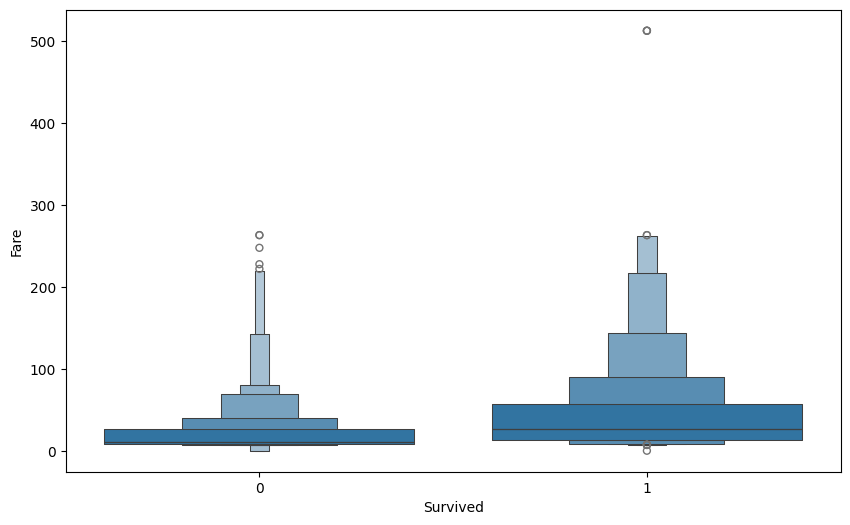

In [ ]:
plt.figure(figsize=(10,6))
box_plot =sns.boxenplot(x = train_data.Survived, y = train_data.Fare, data = train_data)

In [ ]:
train_data[train_data.Fare > 300]

,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
columns_to_drop = ['Cabin', 'Name', 'Ticket']
train_data.drop(columns_to_drop, axis = 1 , inplace = True)

In [ ]:
train_data.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train_data = pd.get_dummies(train_data, columns = ['Gender', 'Embarked'], drop_first = True)

In [ ]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0,1,0,7.2500,True,False,True
2,1,1,38.0,1,0,71.2833,False,False,False
3,1,3,26.0,0,0,7.9250,False,False,True
4,1,1,35.0,1,0,53.1000,False,False,True
5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,True,False,True
888,1,1,19.0,0,0,30.0000,False,False,True
889,0,3,29.6,1,2,23.4500,False,False,True


## Bucketing Continous feature Age

In [ ]:
def new_age(age):

    if age <= 12:
        return 0
    elif age <= 18:
        return 1
    elif age <= 59:
        return 2
    elif age >= 60:
        return 3

train_data.Age= train_data.Age.apply(new_age)
train_data.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
306,1,1,0,1,2,151.5500,True,False,True
520,0,3,2,0,0,7.8958,True,False,True
737,0,3,2,1,3,34.3750,False,False,True
64,0,3,0,3,2,27.9000,True,False,True
617,0,3,2,1,1,14.4000,True,False,True
284,1,3,2,0,0,8.0500,True,False,True
120,0,3,0,4,2,31.2750,False,False,True
158,0,3,2,0,0,8.0500,True,False,True
349,1,3,0,1,1,15.9000,True,False,True


In [ ]:
first_quartile_fare = train_data.Fare.quantile(0.25)
second_quartile_fare = train_data.Fare.quantile(0.25)
third_quartile_fare = train_data.Fare.quantile(0.25)


def fare_bucketizer(r):

    if r <= first_quartile_fare:
        return 0

    elif r <= second_quartile_fare:
        return 1

    elif r <= third_quartile_fare:
        return 2

    else:
        return 3

train_data['fare_class']= train_data.Fare.apply(fare_bucketizer)
train_data.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S,fare_class
PassengerId,,,,,,,,,,
667,0,2,2,0,0,13.0000,True,False,True,3
422,0,3,2,0,0,7.7333,True,True,False,0
520,0,3,2,0,0,7.8958,True,False,True,0
718,1,2,2,0,0,10.5000,False,False,True,3
796,0,2,2,0,0,13.0000,True,False,True,3
836,1,1,2,1,1,83.1583,False,False,False,3
212,1,2,2,0,0,21.0000,False,False,True,3
198,0,3,2,0,1,8.4042,True,False,True,3
160,0,3,2,8,2,69.5500,True,False,True,3


In [ ]:
np.random.seed(1)
data1=20 * np.random.randn(1000)+100
data2=data1 + (10 * np.random.randn(1000)+50)

In [ ]:
print('Data1: mean=%.3f stdv=%.3f'%(np.mean(data1),np.std(data1)))
print('Data2: mean=%.3f stdv=%.3f'%(np.mean(data2),np.std(data2)))

Data1: mean=100.776 stdv=19.620
Data2: mean=151.050 stdv=22.358


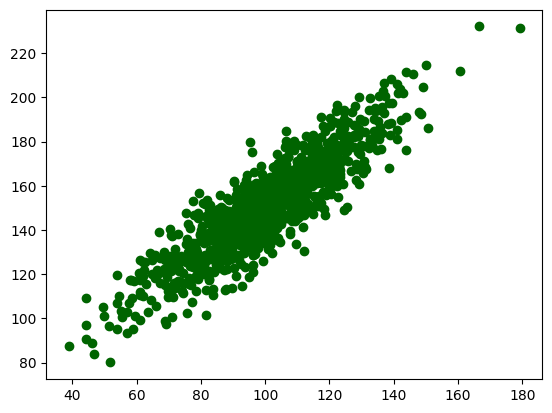

In [ ]:
plt.scatter(data1,data2,color='darkgreen')
plt.show()

In [ ]:
covariance = np.cov(data1,data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


In [ ]:
corr = pearsonr(data1,data2)
print('pearson Correlation:%.3f' %corr)